In [24]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [10]:
df=pd.read_csv('mall_customers.csv')

In [11]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [12]:
df.drop('CustomerID',axis=1,inplace=True)

In [13]:
df['Genre'].replace({'Male':1,'Female':0},inplace=True)

C:\Users\khali\AppData\Local\Temp\ipykernel_4244\2705657720.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Genre'].replace({'Male':1,'Female':0},inplace=True)
C:\Users\khali\AppData\Local\Temp\ipykernel_4244\2705657720.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Genre'].replace(

In [14]:
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


Implementing K-Means Clustering on Customer Segments
Task: Apply K-Means clustering to the Mall Customers dataset to segment customers based on their annual income and spending score. Visualize the resulting clusters.


In [21]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

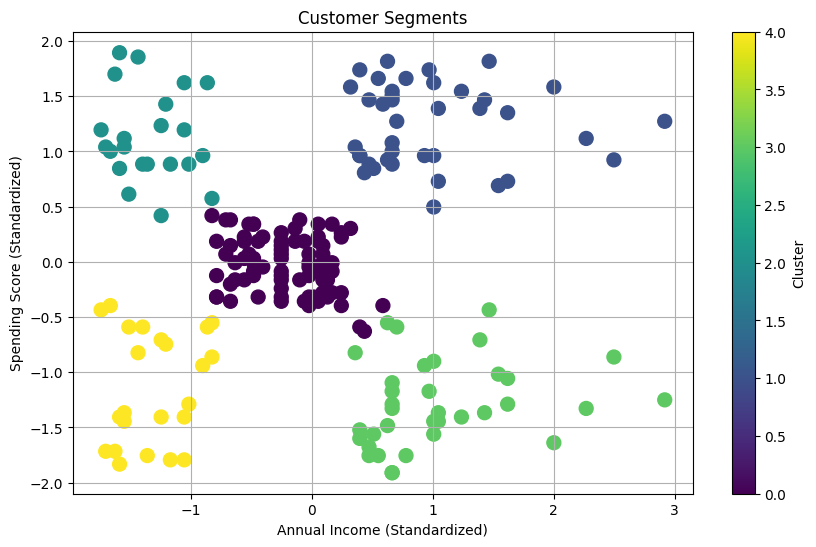

,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,19,15,39,4
1,1,21,15,81,2
2,0,20,16,6,4
3,0,23,16,77,2
4,0,31,17,40,4
...,...,...,...,...,...
195,0,35,120,79,1
196,0,45,126,28,3
197,1,32,126,74,1
198,1,32,137,18,3


In [26]:
df['Cluster'] = kmeans.labels_

# Visualize the resulting clusters
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=df['Cluster'], cmap='viridis', s=100)
plt.title('Customer Segments')
plt.xlabel('Annual Income (Standardized)')
plt.ylabel('Spending Score (Standardized)')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

df

Optimal Number of Clusters: Elbow Method and Silhouette Score
Task: Use the Elbow Method and Silhouette Score to find the optimal number of clusters for the Mall Customers dataset. Discuss the criteria for selecting the number of clusters.


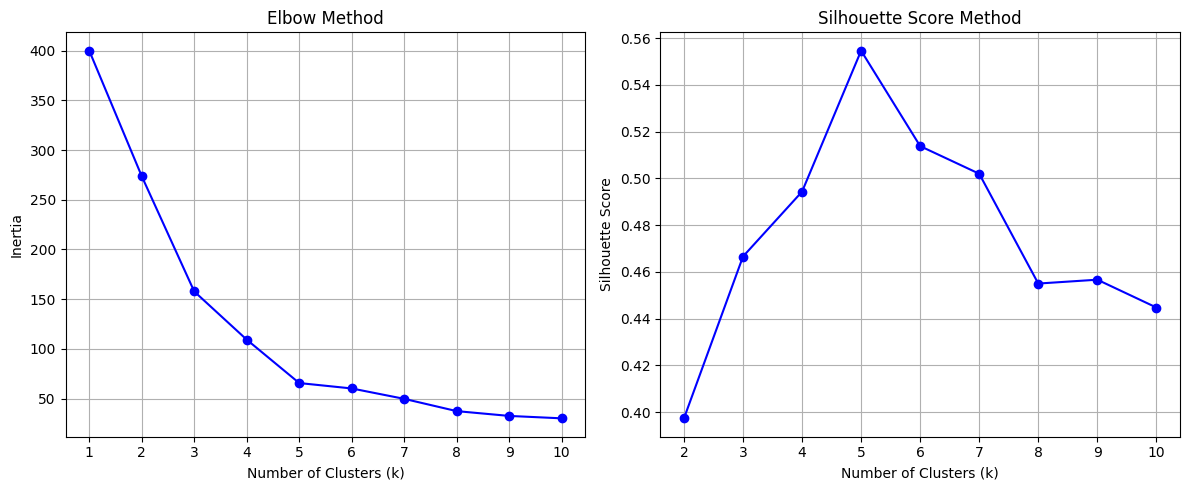

In [30]:
from sklearn.metrics import silhouette_score
import numpy as np

# Elbow Method
inertia = []
silhouette_scores = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    if k > 1:
        score = silhouette_score(X_scaled, kmeans.labels_)
        silhouette_scores.append(score)

# Plot Elbow Method
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.xticks(K)
plt.grid(True)

# Plot Silhouette Scores
plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhouette_scores, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Method')
plt.xticks(range(2, 11))
plt.grid(True)

plt.tight_layout()
plt.show()


Cluster Profiling and Insights
Task: Analyze the characteristics of the clusters formed in the Mall Customers dataset. Provide insights into the customer segments based on their spending behavior and income levels.


In [31]:
# Cluster profiling
cluster_summary = df.groupby('Cluster').agg({
    'Annual Income (k$)': ['mean', 'median'],
    'Spending Score (1-100)': ['mean', 'median', 'count']
}).reset_index()

print(cluster_summary)


  Cluster Annual Income (k$)        Spending Score (1-100)             
                        mean median                   mean median count
0       0          55.296296   54.0              49.518519   50.0    81
1       1          86.538462   79.0              82.128205   83.0    39
2       2          25.727273   24.5              79.363636   77.0    22
3       3          88.200000   85.0              17.114286   16.0    35
4       4          26.304348   25.0              20.913043   17.0    23


Hierarchical Clustering for Customer Segmentation
Task: Implement hierarchical clustering on the Mall Customers dataset. Compare the clusters formed with those obtained from K-Means and discuss the differences.


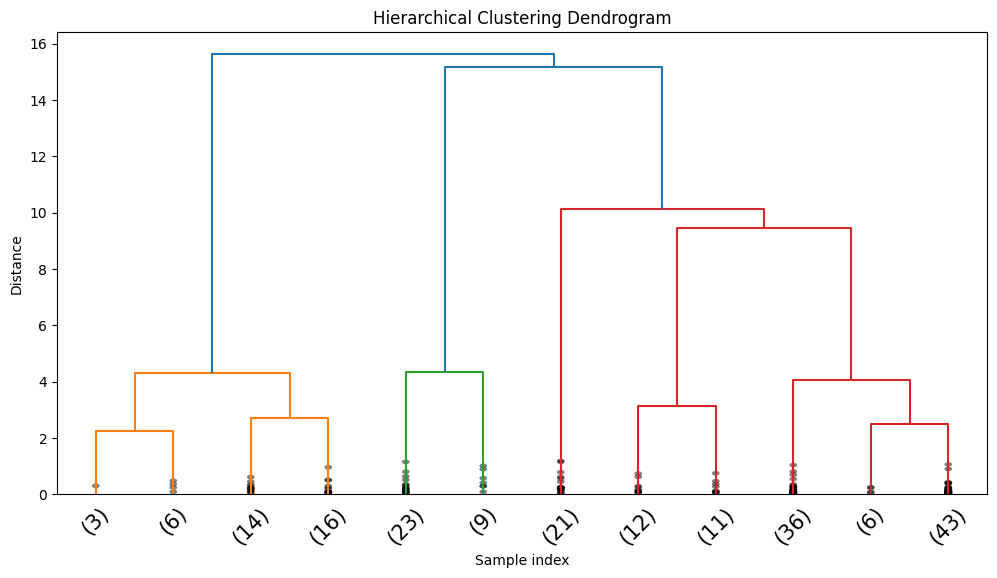

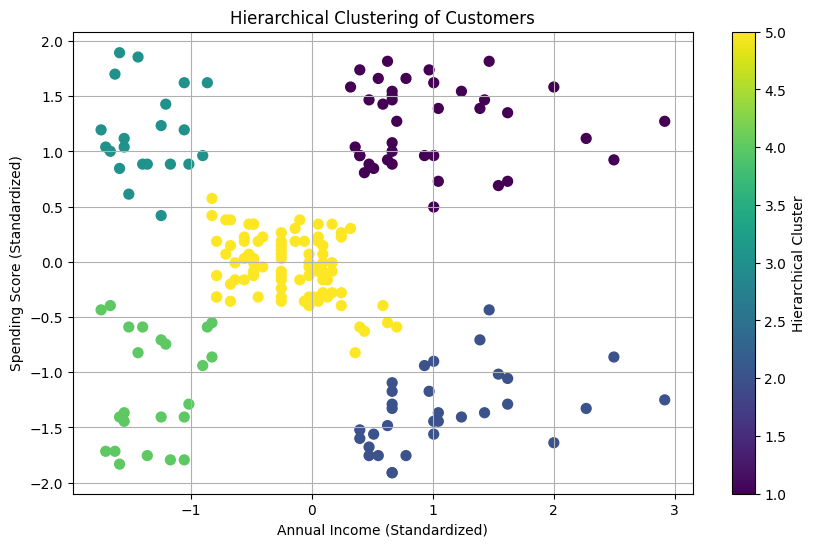

In [33]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# Perform hierarchical clustering
Z = linkage(X_scaled, method='ward')

# Plot dendrogram
plt.figure(figsize=(12, 6))
dendrogram(Z, truncate_mode='lastp', p=12, leaf_rotation=45, leaf_font_size=15, show_contracted=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

# Create clusters
hierarchical_labels = fcluster(Z, 5, criterion='maxclust')
df['Hierarchical Cluster'] = hierarchical_labels

# Visualize hierarchical clustering results
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=df['Hierarchical Cluster'], cmap='viridis', s=50)
plt.title('Hierarchical Clustering of Customers')
plt.xlabel('Annual Income (Standardized)')
plt.ylabel('Spending Score (Standardized)')
plt.colorbar(label='Hierarchical Cluster')
plt.grid(True)
plt.show()


Visualizing Clusters with PCA
Task: Apply PCA to the Mall Customers dataset to reduce its dimensionality. Visualize the clusters from both K-Means and hierarchical clustering in the PCA-reduced space.


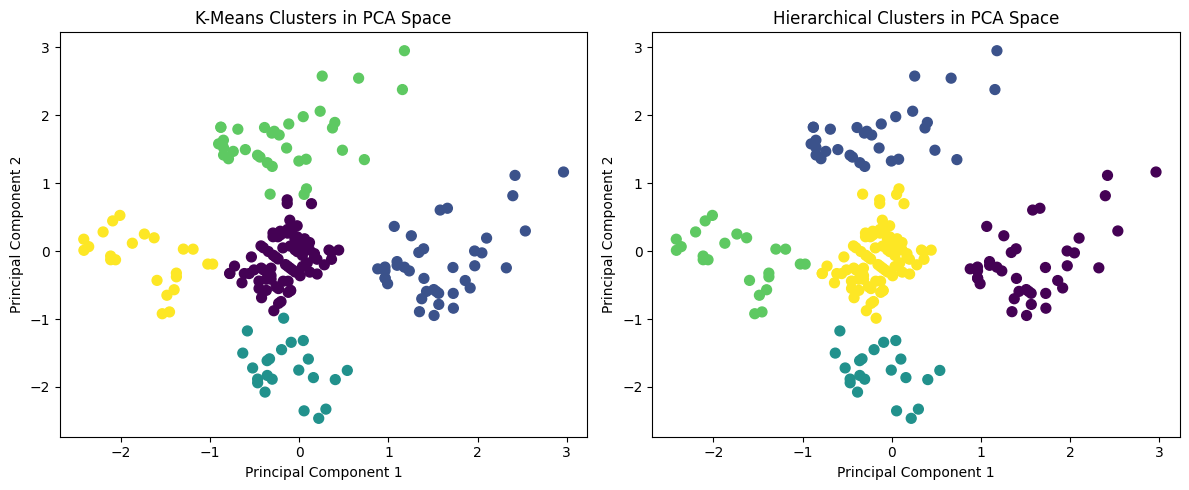

In [34]:
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualize K-Means clusters in PCA space
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['Cluster'], cmap='viridis', s=50)
plt.title('K-Means Clusters in PCA Space')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Visualize Hierarchical clusters in PCA space
plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['Hierarchical Cluster'], cmap='viridis', s=50)
plt.title('Hierarchical Clusters in PCA Space')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.tight_layout()
plt.show()
